# US Accident exploratory data analysis

## Information
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to December 2020.

Currently, there are about 1.5 million accident records in this dataset.

### Acknowledgement
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

### Dataset abbrevations:    

- ID - This is a unique identifier of the accident record.

- Severity - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

- Start_Time - Shows start time of the accident in local time zone.

- End_Time - Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow

- Start_Lat - Shows latitude in GPS coordinate of the start point.

- Start_Lng - Shows longitude in GPS coordinate of the start point.

- End_Lat - Shows latitude in GPS coordinate of the end point.

- End_Lng - Shows longitude in GPS coordinate of the end point.

- Distance(mi) - The length of the road extent affected by the accident.

- Description - Shows natural language description of the accident.

- Number - Shows the street number in address record.

- Street - Shows the street name in address record.

- Side - Shows the relative side of the street (Right/Left) in address record.

- City - Shows the city in address record.

- County - Shows the county in address record.

- State - Shows the state in address record.

- Zipcode - Shows the zipcode in address record.

- Country - Shows the country in address record.

- Timezone - Shows timezone based on the location of the accident (eastern, central, etc.).

- Airport_Code - Denotes an airport-based weather station which is the closest one to location of the accident.

- Weather_Timestamp - Shows the time-stamp of weather observation record (in local time).

- Temperature(F) - Shows the temperature (in Fahrenheit).

- Wind_Chill(F) - Shows the wind chill (in Fahrenheit).

- Humidity(%) - Shows the humidity (in percentage).

- Pressure(in) - Shows the air pressure (in inches).

- Visibility(mi) - Shows visibility (in miles).

- Wind_Direction - Shows wind direction.

- Wind_Speed(mph) - Shows wind speed (in miles per hour).

- Precipitation(in) - Shows precipitation amount in inches, if there is any.

- Weather_Condition - Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

- Amenity - A POI annotation which indicates presence of amenity in a nearby location.

- Bump - A POI annotation which indicates presence of speed bump or hump in a nearby location.

- Crossing - A POI annotation which indicates presence of crossing in a nearby location.

- Give_Way - A POI annotation which indicates presence of give_way in a nearby location.

- Junction - A POI annotation which indicates presence of junction in a nearby location.

- No_Exit - A POI annotation which indicates presence of junction in a nearby location.

- Railway - A POI annotation which indicates presence of railway in a nearby location.

- Roundabout - A POI annotation which indicates presence of roundabout in a nearby location.

- Station - A POI annotation which indicates presence of station in a nearby location.

- Stop - A POI annotation which indicates presence of stop in a nearby location.

- Traffic_Calming - A POI annotation which indicates presence of traffic_calming in a nearby location.

- Traffic_Signal - A POI annotation which indicates presence of traffic_signal in a nearby location.

- Turning_Loop - A POI annotation which indicates presence of turning_loop in a nearby location.

- Sunrise_Sunset - Shows the period of day (i.e. day or night) based on sunrise/sunset.

- Civil_Twilight - Shows the period of day (i.e. day or night) based on civil twilight.

- Nautical_Twilight - Shows the period of day (i.e. day or night) based on nautical twilight.

- Astronomical_Twilight - Shows the period of day (i.e. day or night) based on astronomical twilight.

### Questions:
1. Which city in US has reported the most number of accident cases?
2. Which 5 states reported the highest number of accident cases?
3. Which timezone reported the most number of accident cases?
4. Which street is most accident prone in US?
5. What time of the day are accidents most frequent in?
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year (decreasing/increasing?)
9. Effects of road condition on the accident cases.
10. How did the weather conditions affected the cases?


In [ ]:
pip install opendatasets --upgrade --quiet


In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [ ]:
data_filename = "./us-accidents/US_Accidents_Dec20_updated.csv"

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#1.Loading the file using Pandas
df = pd.read_csv(data_filename)
df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day


In [ ]:
print('The Dataset contains: Rows - {} and Columns - {}'.format(df.shape[0],df.shape[1]))

The Dataset contains: Rows - 1516064 and Columns - 47


In [ ]:
#2.Looking at some overall information and statistics about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

This shows the name of all the columns, it show which columns have null values. The data types used are: int, float, bool and object.

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


Insights-
- This tells us that majority of the accidents (> 75%) had a severity rating of ~2 i.e. the traffic was not highly impacted.
- The average length of the road extent affected by the accidents was ~0.6 miles. So, there was almost no traffic disturbance.
- Accidents took place despite having average visibility of ~9 miles. This could mean that low visibility was not a reason.
- For about 75% of the accidents, no precipitation was reported. This could mean that rain was not a problem.


In [ ]:
# 3. Fixing any missing or incorrect values.
df.isna().mean().sort_values(ascending=False)

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
City                     0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
Civil_Twilight           0.000055
Sunrise_Sunset           0.000055
Amenity                  0.000000
Bump                     0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
End_Lat                  0.000000
End_Lng                  0.000000
Distance(mi)             0.000000
Description   

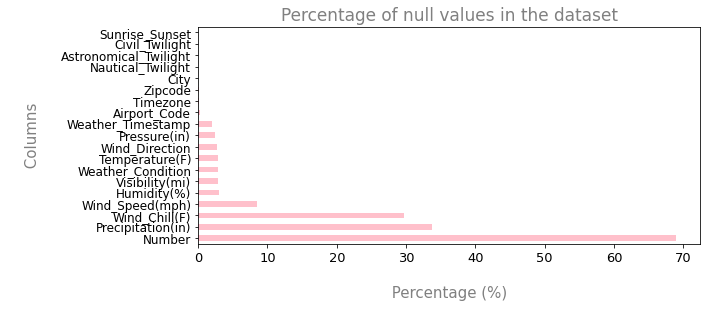

In [ ]:
a = (df.isna().sum().sort_values(ascending=False)/len(df))*100
plt.figure(figsize=(9,4))
plt.title("Percentage of null values in the dataset",size=17,color="grey")
plt.xlabel('\n Percentage (%) \n', fontsize=15, color='grey')
plt.ylabel('\n Columns \n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a[a!=0].plot(kind="barh",color="pink")
plt.show()

- We can see that the Number column has almost 70% data missing, Precipitation(in) and Wind_Chill(F) also have >=30% data missing.
Since, Number column (which shows the street number) has majority of the data missing, we should drop it.

In [ ]:
df = df.drop("Number",axis=1)

## Exploratory analysis and visualisation

### 1. Which city in US has reported the most number of accident cases?


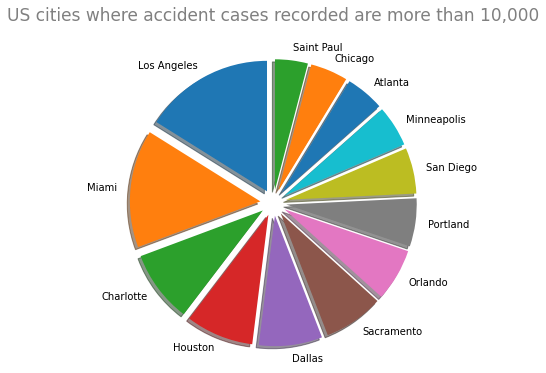

In [ ]:
#As there are 10657 unique cities, we cant plot data for all of them.
#So, I only plot data of cities which had reported more than 10k accident cases.
a = df.City.value_counts()
plt.figure(figsize=(10,6))
plt.title("US cities where accident cases recorded are more than 10,000",size=17,color="grey",y=1.04)
#t = a[a>10000].plot(kind="pie",shadow=True,explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),startangle=130,autopct="%1.1f%%",label="")
lab= a[a>10000].index
plt.pie(a[a>10000],shadow=True,explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),startangle=90,labels=lab)
plt.show()

In [ ]:
largest_acc_city = a[0]
largest_acc_city/5

7996.8

- We see that Los Angeles had the largest number of accidents (it is also the 2nd most populated city of US), Miami is the city with 2nd highest no. of accident cases reported. 
- On average, 7996 accidents very reported in Los Angeles yearly from 2016-2020.
- One anomaly is that New York didn't report accidents larger than 10,000 despite being the most populated city of US (possible reason is less data from this city).

In [ ]:
# Lets try to see the distribution of accidents in cities in log scale.

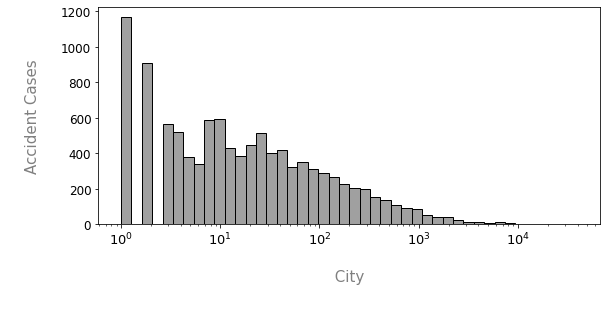

In [ ]:
plt.figure(figsize=(9,4))
plt.xlabel('\n City \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(df.City.value_counts(),log_scale=True,color="grey")
plt.show()

No of accidents in cities are exponentially decreasing. We see large accounts near to 1, possibly because of not data recorded there.

We have 1167 cities which recorded only 1 accident case, this is another data source drawback.

### 2. Which 5 state had the most number of accidents?

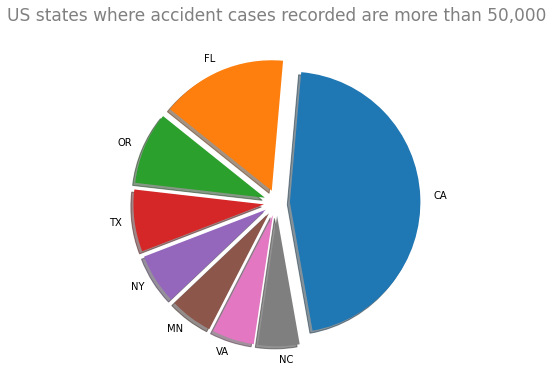

In [ ]:
b = df.State.value_counts()
#b[b>50000].plot(kind="pie",radius=2.0,shadow=True,explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),startangle=90,autopct="%1.1f%%",label="")
plt.figure(figsize=(10,6))
plt.title("US states where accident cases recorded are more than 50,000",size=17,y=1.04,color="grey")
lab= b[b>50000].index
plt.pie(b[b>50000],shadow=True,explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),startangle=280,labels=lab)
plt.show()

- We see that California (CA) had the most number of accidents,followed by Florida, Oregon, Texas and New york.
- In past 5 years, on average 246 accidents (daily) happened in California, implies approximately 10 accidents per hour.

### 3. Which timezone reported the most number of accident cases?

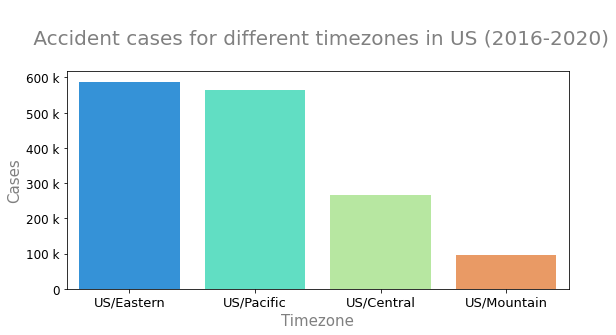

In [ ]:
timezone = pd.DataFrame(df.Timezone.value_counts()).reset_index().rename(columns={"index":"Timezone","Timezone":"Cases"})
plt.figure(figsize=(9,4))
plt.title('\n Accident cases for different timezones in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\n Timezone \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=timezone.Timezone , y=timezone.Cases,palette="rainbow")
import matplotlib.ticker as ticker
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [ ]:
for (i,j) in zip(timezone.Timezone,range(0,4)):
    print("Percentage of accident cases reported in {} is {:.2f}%".format(i,(df.Timezone.value_counts()[j]/(df.Timezone.value_counts()[0] + df.Timezone.value_counts()[1] + df.Timezone.value_counts()[2] + df.Timezone.value_counts()[3]))*100))

Percentage of accident cases reported in US/Eastern is 38.84%
Percentage of accident cases reported in US/Pacific is 37.28%
Percentage of accident cases reported in US/Central is 17.52%
Percentage of accident cases reported in US/Mountain is 6.36%


- US/Eastern timezone region reported the most number of accident cases, followed by US/Pacific, US?Central and US/Mountain.
- US/Eastern timezone region accounts for about 38.84% of the accident cases.
- Us/Mountain region reported the lowest number of accident cases.

###4 Which street is most accident prone in US?

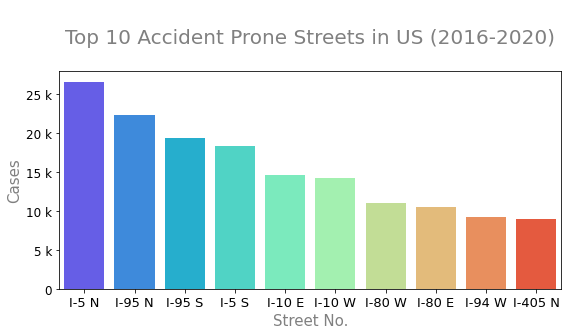

In [ ]:
street = pd.DataFrame(df.Street.value_counts().reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'}))
top_street = pd.DataFrame(street.head(10))
plt.figure(figsize=(9,4))
plt.title('\nTop 10 Accident Prone Streets in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\nStreet No.\n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=top_street["Street No."],y=top_street.Cases,palette="rainbow")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [ ]:
len(df.Street)

1516064

In [ ]:
#top_street["Cases"][0] + top_street["Cases"][1] + 
for (i,j) in zip(street["Street No."],range(0,10)):
    print("Percentage of accident cases reported on street: {} is {:.2f}%".format(i,(street.Cases[j]/len(street.Cases)*100)))

Percentage of accident cases reported on street: I-5 N is 28.64%
Percentage of accident cases reported on street: I-95 N is 24.08%
Percentage of accident cases reported on street: I-95 S is 20.86%
Percentage of accident cases reported on street: I-5 S is 19.81%
Percentage of accident cases reported on street: I-10 E is 15.78%
Percentage of accident cases reported on street: I-10 W is 15.37%
Percentage of accident cases reported on street: I-80 W is 11.82%
Percentage of accident cases reported on street: I-80 E is 11.25%
Percentage of accident cases reported on street: I-94 W is 9.89%
Percentage of accident cases reported on street: I-405 N is 9.70%


- 26,645 (28.64%) accidents occured on Street I-5 N in the last 5 years (2016-2020) in US.
- On average 14 accidents were reported on street I-5 N.

### 5. What time of the day accidents are more frequent in?

In [ ]:
# Lets first parse the Start_Time column as a datetime column.
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
hour = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={"index":"Hour","Start_Time":"Accident_Cases"})

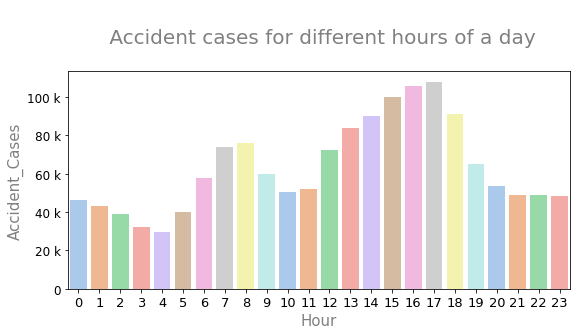

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases for different hours of a day\n', size=20, color='grey')
plt.xlabel('\n Hours \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=hour.Hour,y=hour.Accident_Cases,palette="pastel")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [ ]:
for (i,j) in zip(hour.Hour,range(0,24)):
  print("Percentage of accidents occuring at {} hour is {:.2f}%".format(i,(hour.Accident_Cases[j]/hour.Accident_Cases.sum())*100))

Percentage of accidents occuring at 17 hour is 7.12%
Percentage of accidents occuring at 16 hour is 6.96%
Percentage of accidents occuring at 15 hour is 6.60%
Percentage of accidents occuring at 18 hour is 6.03%
Percentage of accidents occuring at 14 hour is 5.95%
Percentage of accidents occuring at 13 hour is 5.52%
Percentage of accidents occuring at 8 hour is 5.00%
Percentage of accidents occuring at 7 hour is 4.88%
Percentage of accidents occuring at 12 hour is 4.77%
Percentage of accidents occuring at 19 hour is 4.30%
Percentage of accidents occuring at 9 hour is 3.94%
Percentage of accidents occuring at 6 hour is 3.82%
Percentage of accidents occuring at 20 hour is 3.53%
Percentage of accidents occuring at 11 hour is 3.42%
Percentage of accidents occuring at 10 hour is 3.33%
Percentage of accidents occuring at 22 hour is 3.24%
Percentage of accidents occuring at 21 hour is 3.23%
Percentage of accidents occuring at 23 hour is 3.18%
Percentage of accidents occuring at 0 hour is 3.04

- Highest number of accidents occur between 3:00PM - 6:00PM, and between 6:00AM - 9:00AM (Possibly because of work hours). 
- In evening, around 27% of the road accidents occurred in between 3:00PM to 6:00PM.
- Around 18% of the road accidents occurred in between 6:00AM to 9:00AM.
- The most-deadliest accident hour is 5:00PM implies the Evening Office-Returning Hours.
- The 2nd most-deadliest accident hour is 8:00AM implies the Morning Office-Going Hours.
- We see high number of accidents in the evening time frame because people are more tired at that time as compared to morning hours and thus have low concentration. 
- High no of accidents occur in the morning possibly because people are in a hurry to reach their destination.

### 6. Which day of the week accidents are more frequent in?

---



In [ ]:
day = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})

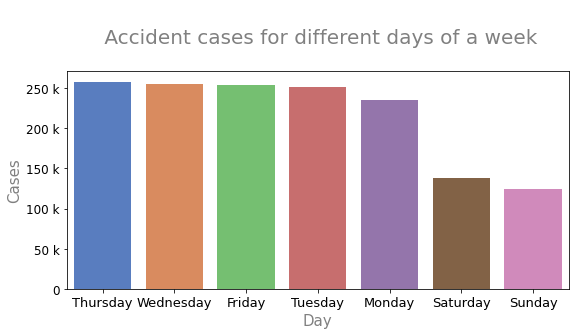

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases for different days of a week\n', size=20, color='grey')
plt.xlabel('\n Day \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=day.Day,y=day.Cases,palette="muted")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [ ]:
for (i,j) in zip(day.Day,range(0,7)):
  print("Percentage of accidents occuring at {} hour is {:.2f}%".format(i,(day.Cases[j]/day.Cases.sum())*100))

Percentage of accidents occuring at Thursday hour is 17.02%
Percentage of accidents occuring at Wednesday hour is 16.87%
Percentage of accidents occuring at Friday hour is 16.76%
Percentage of accidents occuring at Tuesday hour is 16.55%
Percentage of accidents occuring at Monday hour is 15.56%
Percentage of accidents occuring at Saturday hour is 9.08%
Percentage of accidents occuring at Sunday hour is 8.16%


- Thrusday reported the highest no of cases.
- It looks like overall it is evenly distributed on the business days.
- Only around 17% of the cases were reported on weekends.
- Working Days of the week have almost 2 times higher accident percentage, compared with the Weekend Days which is expected.
- As a surprise, there are less accidents occuring on the weekends, probably because of low vehichles on road? Lets verify it.

Lets see how the accidents are distributed over different hour of the day on the weekends.

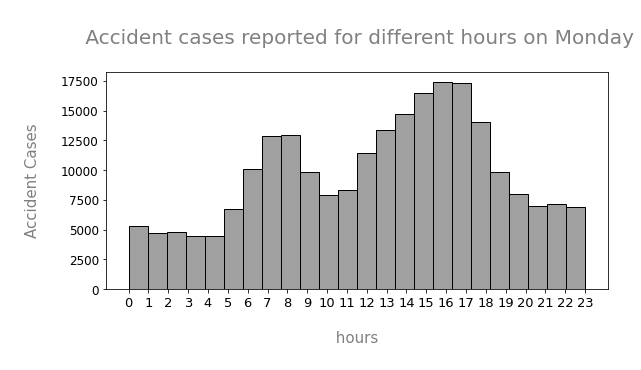

In [ ]:
# Lets look at monday first.
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different hours on Monday\n', size=20, color='grey')
plt.xlabel('\n hours \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
monday = df.Start_Time[df.Start_Time.dt.dayofweek==0]
a = sns.histplot(monday.dt.hour,bins=24,color="grey")
a.xaxis.set_ticks(range(0,24))
# More accidents take place in the morning and in the evening after people are going to/coming from their job.
plt.show()

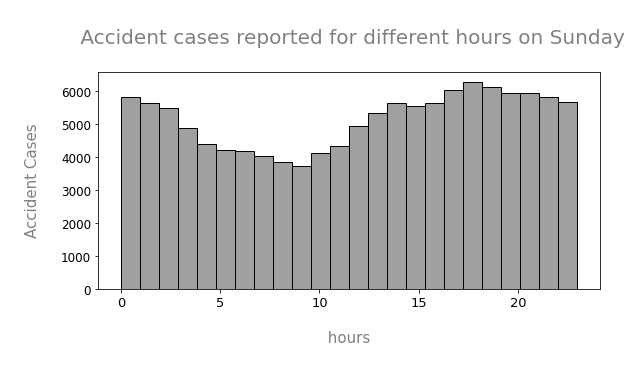

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different hours on Sunday\n', size=20, color='grey')
plt.xlabel('\n hours \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sunday = df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.histplot(sunday.dt.hour,bins=24,color="grey")
plt.show()

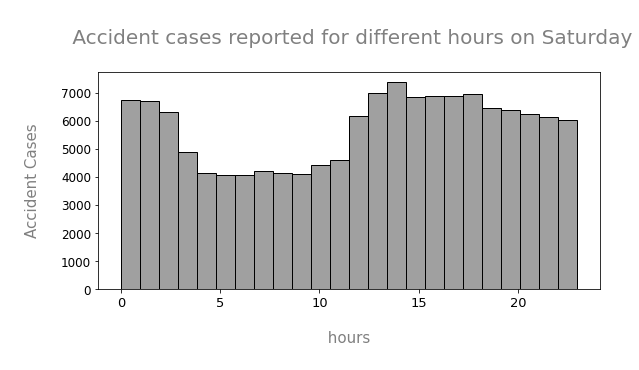

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different hours on Saturday\n', size=20, color='grey')
plt.xlabel('\n hours \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
saturday = df.Start_Time[df.Start_Time.dt.dayofweek==5]
sns.histplot(saturday.dt.hour,bins=24,color="grey")
plt.show()

- On the weekends, the distribution of accidents taking place over the day looks very different from that of on weekdays. It is more distributed through out the day, instead of peaking at a specific hour range.

### 7. Which month accidents are more frequent in?


In [ ]:
import calendar
month = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={"index":"Month","Start_Time":"Accident_Cases"}).sort_values('Month')
month_names = list(calendar.month_name)[1:]
month.Month = month_names

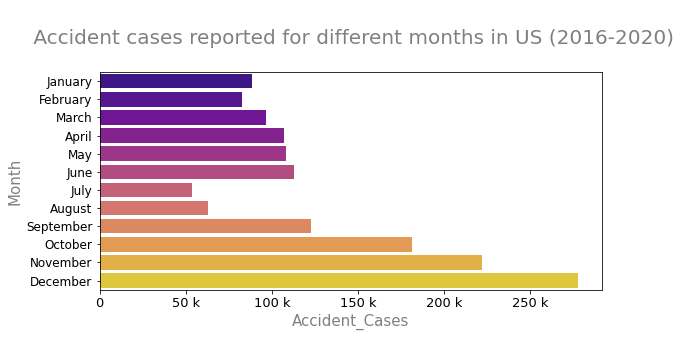

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different months in US (2016-2020)\n', size=20, color='grey')
plt.ylabel('\n Months \n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

a = sns.barplot(x=month.Accident_Cases,y=month.Month,palette="plasma")
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [ ]:
for (i,j) in zip(month.Month,range(0,12)):
  print("Percentage of accidents occuring in month {} is {:.2f}%".format(month.Month[j],(month.Accident_Cases[j]/month.Accident_Cases.sum())*100))

Percentage of accidents occuring in month December is 18.30%
Percentage of accidents occuring in month November is 14.65%
Percentage of accidents occuring in month October is 11.94%
Percentage of accidents occuring in month September is 8.11%
Percentage of accidents occuring in month June is 7.46%
Percentage of accidents occuring in month May is 7.14%
Percentage of accidents occuring in month April is 7.06%
Percentage of accidents occuring in month March is 6.39%
Percentage of accidents occuring in month January is 5.84%
Percentage of accidents occuring in month February is 5.44%
Percentage of accidents occuring in month August is 4.15%
Percentage of accidents occuring in month July is 3.54%


- Around 18% of the cases are reported in December.
-  July is the month with least (3.54%) no. of road accidents in US.
- 45% of the road accidents occurred only within the 3 months, October to December
- We see towards the end of the year the number of accidents is quite high.
- Also, the dataset is from Feb 2016-Dec2020, we are missing January data for 1 year but that should not make much of a difference.

Lets try to figure out why there are more accidents towards the end of the year?
Lets try to look at it for different years.

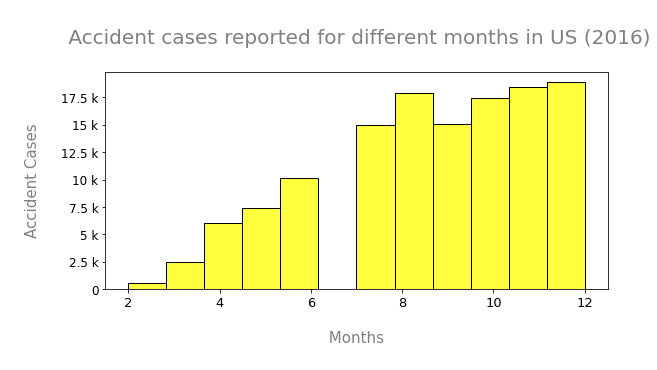

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different months in US (2016)\n', size=20, color='grey')
plt.xlabel('\n Months \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
year = df.Start_Time[df.Start_Time.dt.year==2016]
a = sns.histplot(year.dt.month,bins=12,color="yellow")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

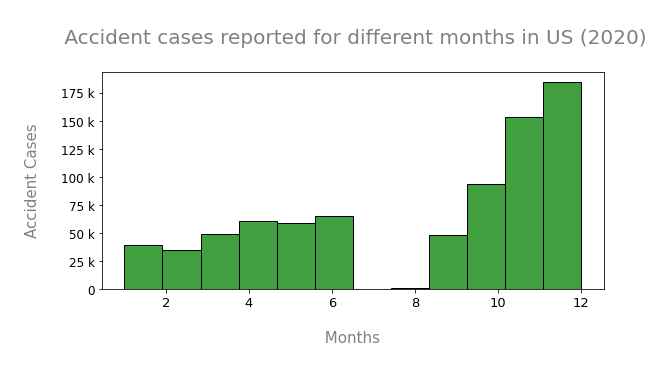

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different months in US (2020)\n', size=20, color='grey')
plt.xlabel('\n Months \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
year = df.Start_Time[df.Start_Time.dt.year==2020]
a = sns.histplot(year.dt.month,bins=12,color="green")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

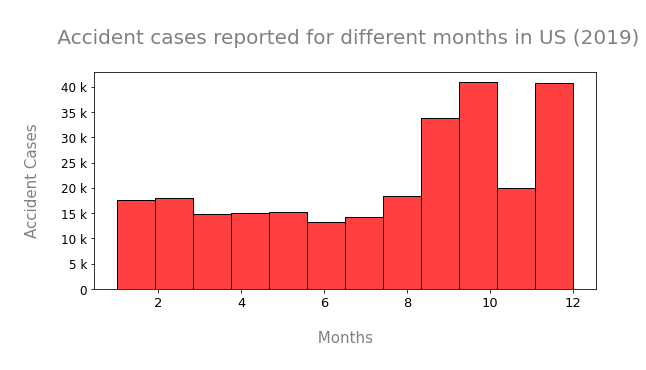

In [ ]:

plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different months in US (2019)\n', size=20, color='grey')
plt.xlabel('\n Months \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
year = df.Start_Time[df.Start_Time.dt.year==2019]
a = sns.histplot(year.dt.month,bins=12,color="red")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

- We can see that for year 2016,2019,2020 less data was recorded for first 6 months. This could explain why we observed more accident cases reports in the last quarter of the year.
- The dataset is a compilation of records from different sources, it means that the source has missing data.

### 8. What is the trend of accidents year over year?

In [ ]:
year = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={"index":"Year","Start_Time":"Accident_Cases"})

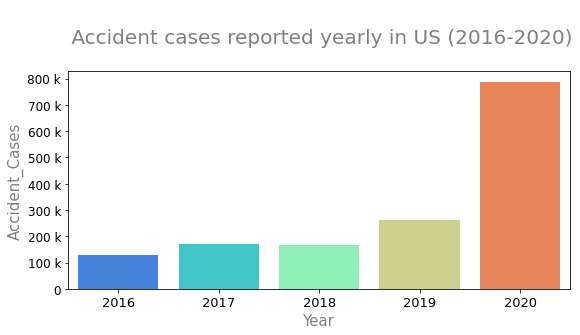

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported yearly in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\n Year \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=year.Year, y = year.Accident_Cases,palette="rainbow")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

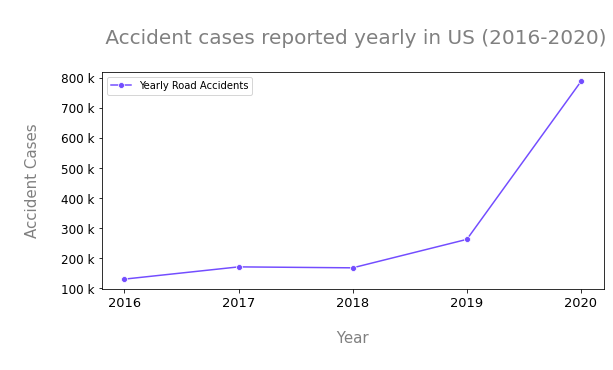

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported yearly in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\n Year \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.lineplot(data = year, marker='o', x='Year', y='Accident_Cases', color = '#734dff', label="Yearly Road Accidents")
a.xaxis.set_ticks(year.Year)
a.yaxis.set_major_formatter(ticker.EngFormatter())

plt.show()

In [ ]:
for (i,j) in zip(year.Year,range(0,5)):
  print("Percentage of accidents occuring in year {} is {:.2f}%".format(i,(year.Accident_Cases[j]/year.Accident_Cases.sum())*100))

Percentage of accidents occuring in year 2020 is 51.97%
Percentage of accidents occuring in year 2019 is 17.27%
Percentage of accidents occuring in year 2017 is 11.22%
Percentage of accidents occuring in year 2018 is 11.01%
Percentage of accidents occuring in year 2016 is 8.53%


In [ ]:
for (i,j) in zip(year.Year,range(0,5)):
  print("Average no. of accidents occuring per month in year {} is {}.".format(i,round(year.Accident_Cases[j]/12)))

Average no. of accidents occuring per month in year 2020 is 65661.
Average no. of accidents occuring per month in year 2019 is 21814.
Average no. of accidents occuring per month in year 2017 is 14175.
Average no. of accidents occuring per month in year 2018 is 13911.
Average no. of accidents occuring per month in year 2016 is 10777.


In [ ]:
for (i,j) in zip(year.Year,range(0,5)):
  print("Average no. of accidents occuring per day in year {} is {}.".format(i,round(year.Accident_Cases[j]/365)))

Average no. of accidents occuring per day in year 2020 is 2159.
Average no. of accidents occuring per day in year 2019 is 717.
Average no. of accidents occuring per day in year 2017 is 466.
Average no. of accidents occuring per day in year 2018 is 457.
Average no. of accidents occuring per day in year 2016 is 354.


In [ ]:
for (i,j) in zip(year.Year,range(0,5)):
  print("Average no. of accidents occuring per hour in year {} is {:.2f}.".format(i,(year.Accident_Cases[j]/365)/24))

Average no. of accidents occuring per hour in year 2020 is 89.95.
Average no. of accidents occuring per hour in year 2019 is 29.88.
Average no. of accidents occuring per hour in year 2017 is 19.42.
Average no. of accidents occuring per hour in year 2018 is 19.06.
Average no. of accidents occuring per hour in year 2016 is 14.76.


- We see that the trend is almost exponentially increasing year by year with a sharp rise in year 2020.
- Year 2020 reported half of the cases in the whole data set.
- 65661 accidents reported per month in year 2020.
- On Average, 2159 accidents were reported daily i.e 90 cases per hour, in year 2020 alone.
- Least no. of accident cases were reported in year 2016.
- From 2019 to 2020 the average accident/day has increased 3 times in US.
- Compared to year 2016, average no of accidents per hour has increased by 6 times.


### 9. Effect of road conditions on the accident cases.


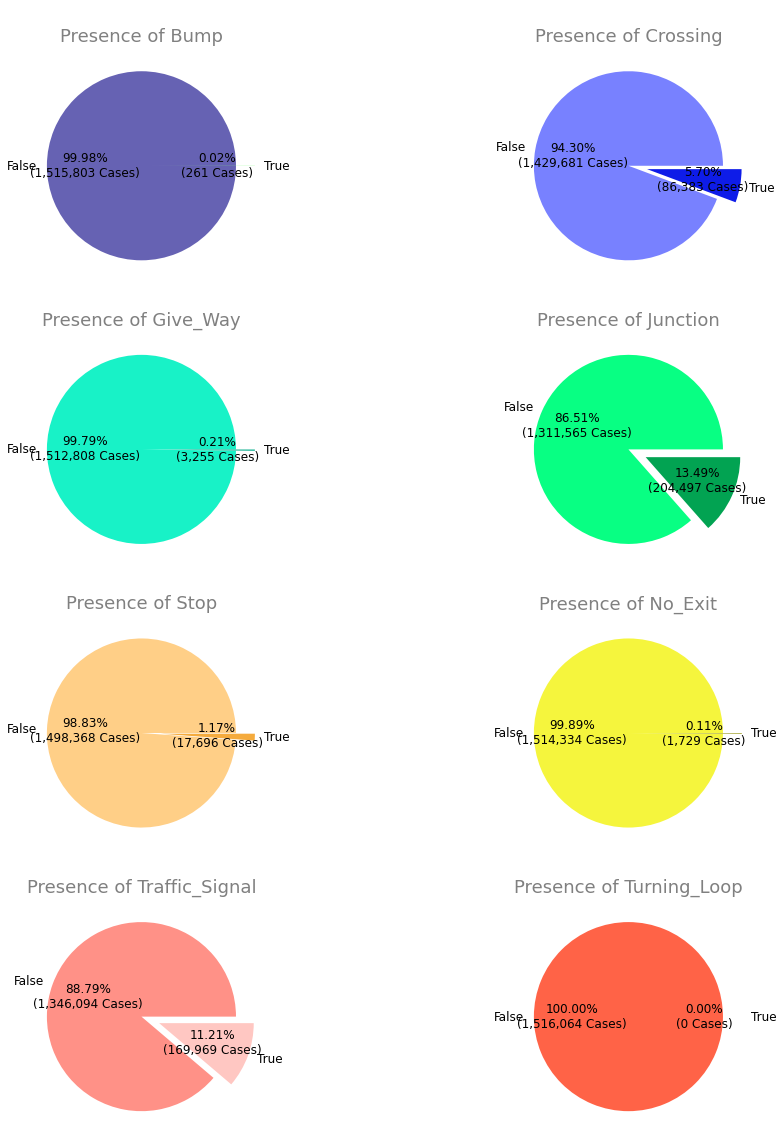

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (16,20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#6662b3', '#00FF00'), ('#7881ff', '#0e1ce8'), ('#18f2c7', '#09ad8c'), ('#08ff83', '#02a352'), ('#ffcf87', '#f5ab3d'),
         ('#f5f53d', '#949410'), ('#ff9187', '#ffc7c2'), ('tomato', '#008000')]    
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)    

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    
    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)
    
    labels = ['False', 'True']
    
    
    
    i.pie(size, labels = labels, colors = colors[count],
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPresence of {}'.format(road_conditions[count])

    i.set_title(title, fontsize = 18, color='grey')
    
    count += 1

- Almost in every case (99.98%) Bumper was absent in the accident spot.

- In 5.7% cases, road accidents happened near the crossing.

- In 98.83% cases, there were no Stop near the accident area.

- 13.49% road accident cases recorded near the junctions.

- There are no accident cases recorded near the Turning Loop.

- 11.21% road accident cases recorded near the traffic signal.

### 10. How did the weather conditions affected the cases?

In [ ]:
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


In [ ]:
temp = pd.DataFrame(df["Temperature(F)"].value_counts()).reset_index().rename(columns={"index":"Temp","Temperature(F)":"Cases"})

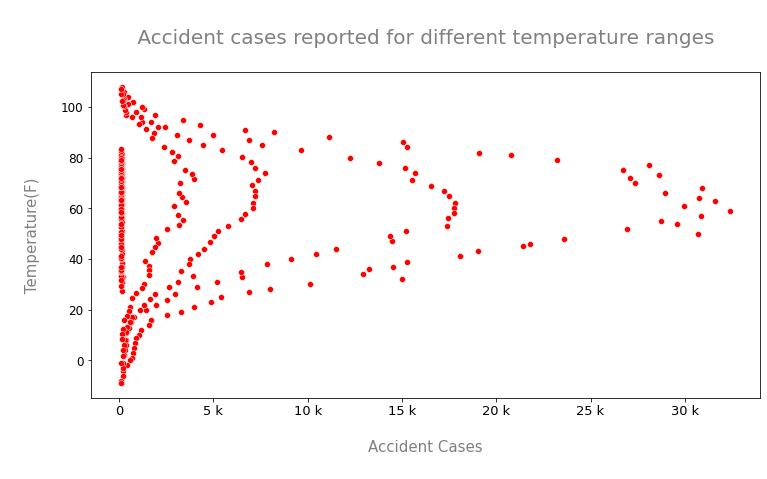

In [ ]:
plt.figure(figsize=(12,6))
plt.title('\n Accident cases reported for different temperature ranges \n', size=20, color='grey')
plt.ylabel('\n Temperature(F) \n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=temp.Cases[temp.Cases>100],y=temp.Temp,color="red")
a.xaxis.set_major_formatter(ticker.EngFormatter())

plt.show()

- We see that maximum no of cases occured between temperature range: 40-80 F.

In [ ]:
humid = pd.DataFrame(df["Humidity(%)"].value_counts()).reset_index().rename(columns={"index":"Humidity","Humidity(%)":"Cases"})

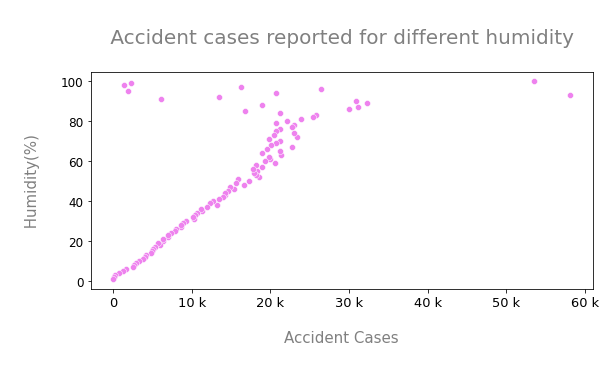

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different humidity \n', size=20, color='grey')
plt.ylabel('\n Humidity(%) \n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=humid.Cases,y=humid.Humidity,color="violet")
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()


- We see that as the humidity increases the no of cases also increases.

In [ ]:
pressure = pd.DataFrame(df["Pressure(in)"].value_counts()).reset_index().rename(columns={"index":"Pressure","Pressure(in)":"Cases"})

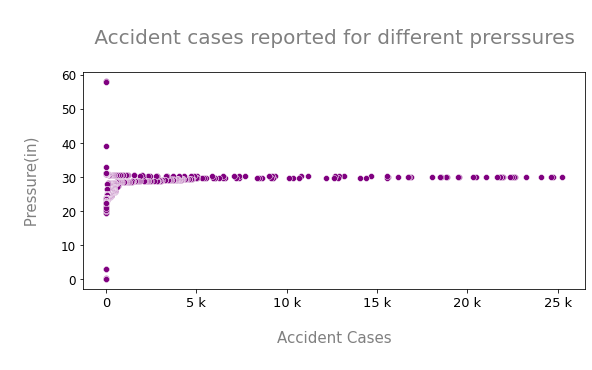

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different prerssures \n', size=20, color='grey')
plt.ylabel('\n Pressure(in) \n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=pressure.Cases,y=pressure.Pressure,color="purple")
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

- Higest no of accident occured when the air pressure range is between 20(in) - 30(in).

In [ ]:
wind = pd.DataFrame(df["Wind_Chill(F)"].value_counts()).reset_index().rename(columns={"index":"Wind_Chill","Wind_Chill(F)":"Cases"})

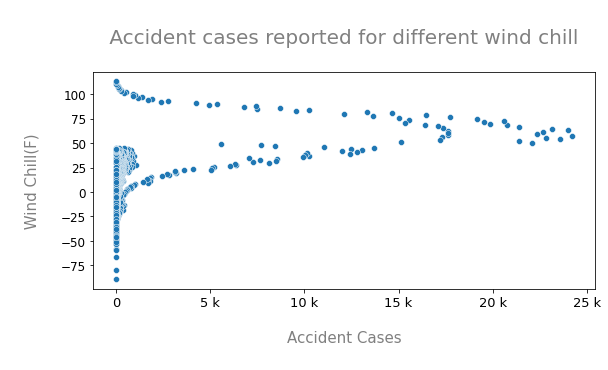

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different wind chill \n', size=20, color='grey')
plt.ylabel('\n Wind Chill(F) \n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=wind.Cases,y=wind.Wind_Chill)
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

- Large no. of cases were reported for wind chill range between 51(F) - 71(F).

In [ ]:
wind = pd.DataFrame(df["Wind_Speed(mph)"].value_counts()).reset_index().rename(columns={"index":"Wind_Speed","Wind_Speed(mph)":"Cases"})

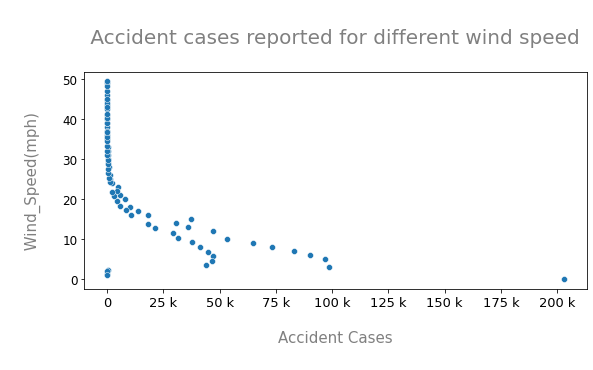

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different wind speed \n', size=20, color='grey')
plt.ylabel('\n Wind_Speed(mph) \n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=wind.Cases,y=wind.Wind_Speed[wind.Wind_Speed<50])
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

 - Maximum cases were recorded for the wind speed range between 5(mph) - 10(mph), which is not much and thus it is not a major cause behind the accidents.

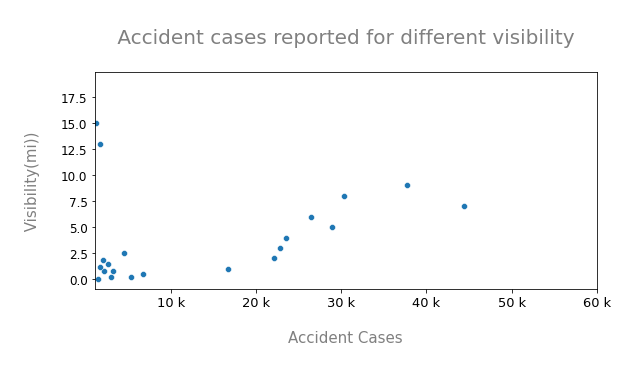

In [ ]:
visibility = pd.DataFrame(df["Visibility(mi)"].value_counts()).reset_index().rename(columns={"index":"Visibility","Visibility(mi)":"Cases"})
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different visibility \n', size=20, color='grey')
plt.ylabel('\n Visibility(mi)) \n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(1000,60000)
a = sns.scatterplot(x=visibility.Cases,y=visibility.Visibility[visibility.Visibility<20])
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

- In maximum cases of road accident, the Visibility range is between 5(mi) - 10(mi), which is quite good and thus it is not a major cause behind the accidents.

In [ ]:
weather_condition_df = pd.DataFrame(df.Weather_Condition.value_counts().head(10)).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})

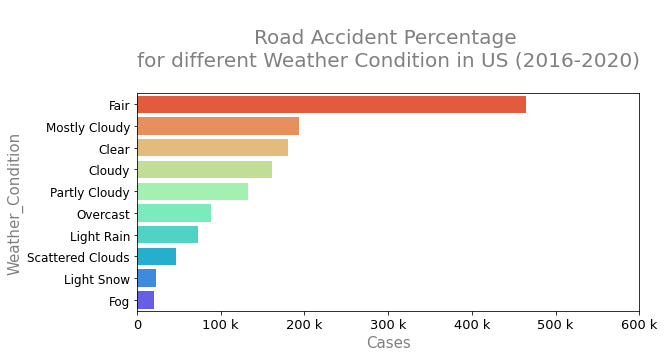

In [ ]:
plt.figure(figsize=(9,4))
plt.title('\nRoad Accident Percentage \nfor different Weather Condition in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.ylabel('\nWeather_Condition\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 600000)
a = sns.barplot(x=weather_condition_df['Cases'], y=weather_condition_df['Weather_Condition'], palette='rainbow_r')
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

- We can see from this that Weather condition was Fair most of the time and thus it is not a major cause behind the accidents.

Insights:
- The majority of the accidents (> 75%) had a severity rating of ~2 i.e. the traffic was not highly impacted.
- The average length of the road extent affected by the accidents was ~0.6 miles. So, there was almost no traffic disturbance.
- We can see that the Number column has almost 70% data missing, Precipitation(in) and Wind_Chill(F) also have >=30% data missing.
Since, Number column (which shows the street number) has majority of the data missing, we should drop it.
- Los Angeles had the largest number of accidents (it is also the 2nd most populated city of US), Miami is the city with 2nd highest no. of accident cases reported. 
- On average, 7996 accidents very reported in Los Angeles yearly from 2016-2020.
- One anomaly is that New York didn't report accidents larger than 10,000 despite being the most populated city of US (possible reason is less data from this city).
- We have 1167 cities which recorded only 1 accident case, this is another data source drawback.
- We see that California (CA) had the most number of accidents,followed by Florida, Oregon, Texas and New york.
- In past 5 years, on average 246 accidents (daily) happened in California, implies approximately 10 accidents per hour.
- US/Eastern timezone region reported the most number of accident cases, followed by US/Pacific, US?Central and US/Mountain.
- US/Eastern timezone region accounts for about 38.84% of the accident cases.
- Us/Mountain region reported the lowest number of accident cases.
- 26,645 (28.64%) accidents occured on Street I-5 N in the last 5 years (2016-2020) in US.
- On average 14 accidents were reported on street I-5 N.
- Highest number of accidents occur between 3:00PM - 6:00PM, and between 6:00AM - 9:00AM (Possibly because of work hours). 
- In evening, around 27% of the road accidents occurred in between 3:00PM to 6:00PM.
- Around 18% of the road accidents occurred in between 6:00AM to 9:00AM.
- The most-deadliest accident hour is 5:00PM implies the Evening Office-Returning Hours.
- The 2nd most-deadliest accident hour is 8:00AM implies the Morning Office-Going Hours.
- We see high number of accidents in the evening time frame because people are more tired at that time as compared to morning hours and thus have low concentration. 
- High no of accidents occur in the morning possibly because people are in a hurry to reach their destination.
- Thrusday reported the highest no of cases.
- It looks like overall the cases over different hour is evenly distributed on the business days.
- Only around 17% of the cases were reported on weekends.
- Working Days of the week have almost 2 times higher accident percentage, compared with the Weekend Days which is expected.
- As a surprise, there are less accidents occuring on the weekends.
- On the weekends, the distribution of accidents taking place over the day looks very different from that of on weekdays. It is more distributed through out the day, instead of peaking at a specific hour range.
- Around 18% of the cases are reported in December.
- July is the month with least (3.54%) no. of road accidents in US.
- 45% of the road accidents occurred only within the 3 months, October to December
- We see towards the end of the year the number of accidents is quite high.
- Also, the dataset is from Feb 2016-Dec2020, we are missing January data for 1 year but that should not make much of a difference.
- For year 2016,2019,2020 less data was recorded for first 6 months. This could explain why we observed more accident cases reports in the last quarter of the year.
- This dataset is a compilation of records from different sources, the accident cases for different months of different year shows that the sources has missing data.
- The trend of accident cases is almost exponentially increasing year by year with a sharp rise in year 2020.
- Year 2020 reported half of the cases in the whole data set.
- 65661 accidents reported per month in year 2020.
- On Average, 2159 accidents were reported daily i.e 90 cases per hour, in year 2020 alone.
- Least no. of accident cases were reported in year 2016.
- From 2019 to 2020 the average accident/day has increased 3 times in US.
- Compared to year 2016, average no of accidents per hour has increased by 6 times.
- Almost in every case (99.98%) Bumper was absent in the accident spot.
- In 5.7% cases, road accidents happened near the crossing.
- In 98.83% cases, there were no Stop near the accident area.
- 13.49% road accident cases recorded near the junctions.
- There are no accident cases recorded near the Turning Loop.
- 11.21% road accident cases recorded near the traffic signal.
- Maximum no of cases occured between temperature range: 40-80 F.
- Humidity increases the no of cases also increases.
- Higest no of accident occured when the air pressure range is between 20(in) - 30(in).
- Large no. of cases were reported for wind chill range between 51(F) - 71(F).
- Maximum cases were recorded for the wind speed range between 5(mph) - 10(mph), which is not much and thus it is not a major cause behind the accidents.
- In maximum cases of road accident, the Visibility range is between 5(mi) - 10(mi), which is quite good and thus it is not a major cause behind the accidents.
- Weather condition was Fair most of the time and thus it is not a major cause behind the accidents.